In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Copy of RideShare.csv")
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Data Preprocessing

In [ ]:
X = data.drop(['instant','dteday','casual','registered','cnt'], axis=1)
Y = data['cnt']
Y1 = data['casual']
Y2 = data['registered']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y1, test_size=0.2, random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import parallel_backend

### model optimization CV

In [ ]:
##step 1: use gridsearchCV to find ideal hyperparameters- same process as before

#### DO NOT RUN IF ALREADY RAN ####

rf = RandomForestRegressor(n_estimators=200, random_state=42)

param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [100, 200, None],
    'min_samples_leaf': [2, 3, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, scoring='neg_mean_squared_error')

with parallel_backend('threading'):
    grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
Y_pred = best_rf.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:71: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 2/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-2086.289 total time=   8.0s
[CV 1/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-1757.156 total time=   8.2s
[CV 3/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-1839.105 total time=   6.8s
[CV 4/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-1972.671 total time=   6.8s
[CV 5/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-2059.672 total time=   9.4s
[CV 1/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-1764.621 total time=  18.5s
[CV 2/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-2093.981 total time=  17.1s
[CV 3/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-1839.468 total time=  16.0s
[CV 4/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-1957.186 total time=  13.9s
[CV 5/5] END max_dep

In [ ]:
##step 1: use gridsearchCV to find ideal hyperparameters- same process as before

#### DO NOT RUN IF ALREADY RAN ####

rf = RandomForestRegressor(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [100, 200, None],
    'min_samples_leaf': [2, 3, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, scoring='neg_mean_squared_error')

with parallel_backend('threading'):
    grid_search.fit(X_train1, Y_train1)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf1 = grid_search.best_estimator_
Y_pred1 = best_rf1.predict(X_test1)

mse = mean_squared_error(Y_test1, Y_pred1)
r2 = r2_score(Y_test1, Y_pred1)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:71: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)


[CV 2/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-236.318 total time=   5.8s
[CV 1/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-232.202 total time=   5.9s
[CV 4/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-230.840 total time=   7.6s
[CV 3/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-240.423 total time=   7.9s
[CV 5/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-235.138 total time=   5.7s
[CV 1/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-231.699 total time=  13.1s
[CV 2/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-235.987 total time=  13.5s
[CV 3/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-238.912 total time=  12.8s
[CV 4/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-231.820 total time=  13.4s
[CV 5/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-230.200 total tim

In [ ]:
##step 1: use gridsearchCV to find ideal hyperparameters- same process as before

#### DO NOT RUN IF ALREADY RAN ####

rf = RandomForestRegressor(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [100, 200, None],
    'min_samples_leaf': [2, 3, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, scoring='neg_mean_squared_error')

with parallel_backend('threading'):
    grid_search.fit(X_train2, Y_train2)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf2 = grid_search.best_estimator_
Y_pred2 = best_rf2.predict(X_test2)

mse = mean_squared_error(Y_test2, Y_pred2)
r2 = r2_score(Y_test2, Y_pred2)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:71: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-1153.411 total time=   8.0s
[CV 2/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-1420.658 total time=   8.1s
[CV 3/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-1282.327 total time=   6.2s
[CV 4/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-1273.665 total time=   6.2s
[CV 5/5] END max_depth=100, min_samples_leaf=2, n_estimators=100;, score=-1374.750 total time=   7.9s
[CV 1/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-1149.794 total time=  14.4s
[CV 2/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-1416.200 total time=  14.3s
[CV 3/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-1271.031 total time=  14.2s
[CV 4/5] END max_depth=100, min_samples_leaf=2, n_estimators=200;, score=-1263.600 total time=  14.3s
[CV 5/5] END max_dep

### Model train with best hyperparameter_cnt

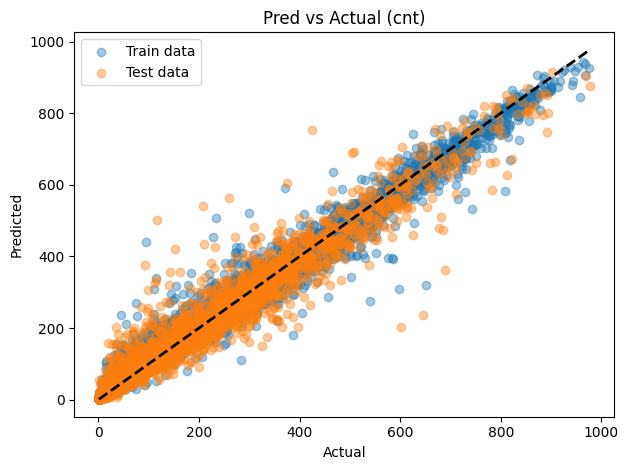

Feature Importances:
       Feature  Importance
3           hr    0.619788
8         temp    0.118976
1           yr    0.081705
6   workingday    0.058023
10         hum    0.024406
0       season    0.021831
9        atemp    0.020088
7   weathersit    0.017378
2         mnth    0.015286
5      weekday    0.011935
Train Model - Mean Squared Error: 508.4829
Train Model - R^2 Score: 0.9847
Final Model - Mean Squared Error: 1761.7133
Final Model - R^2 Score: 0.9444


In [ ]:
#Step 2: Train new model with best hyperparameters
# note - after grid search cv, best params were: n_estimators = 500 max_depth = 100 and min_samples_leaf = 2

final_rf = RandomForestRegressor(n_estimators=500,
                                 max_depth= 100, #grid_search.best_params_['max_depth']
                                 min_samples_leaf= 2, #grid_search.best_params_['min_samples_leaf']
                                 random_state=42)

final_rf.fit(X_train, Y_train)

#plotting and feature importances

Y_pred_train = final_rf.predict(X_train)
Y_pred_final = final_rf.predict(X_test)

plt.scatter(Y_train, Y_pred_train, alpha=0.4, label = 'Train data')
plt.scatter(Y_test, Y_pred_final, alpha=0.4, label = 'Test data')

plt.plot([Y_test.min(), Y_test.max()],
            [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title(f'Pred vs Actual (cnt)')

plt.tight_layout()
plt.show()

importances = final_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df.head(10))

mse_train = mean_squared_error(Y_train, Y_pred_train)
r2_train = r2_score(Y_train, Y_pred_train)

mse_final = mean_squared_error(Y_test, Y_pred_final)
r2_final = r2_score(Y_test, Y_pred_final)

print(f"Train Model - Mean Squared Error: {mse_train:.4f}")
print(f"Train Model - R^2 Score: {r2_train:.4f}")

print(f"Final Model - Mean Squared Error: {mse_final:.4f}")
print(f"Final Model - R^2 Score: {r2_final:.4f}")

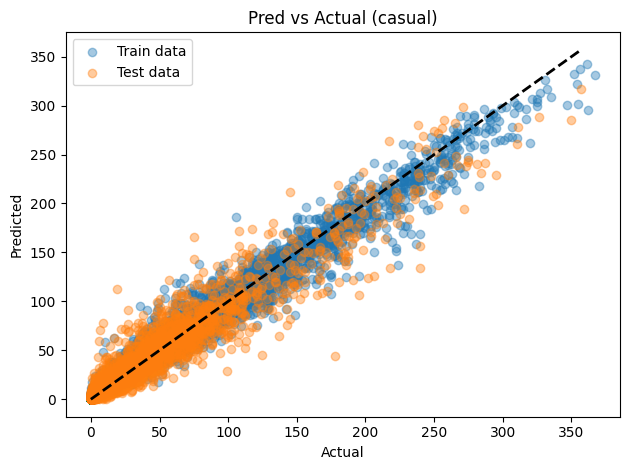

Feature Importances:
       Feature  Importance
3           hr    0.380821
6   workingday    0.198572
8         temp    0.174562
9        atemp    0.070882
10         hum    0.053375
1           yr    0.042075
2         mnth    0.023630
5      weekday    0.018719
11   windspeed    0.018205
0       season    0.007682
Train Model - Mean Squared Error: 58.8969
Train Model - R^2 Score: 0.9761
Final Model - Mean Squared Error: 191.5783
Final Model - R^2 Score: 0.9166


In [ ]:
#Step 2: Train new model with best hyperparameters
# note - after grid search cv, best params were: n_estimators = 500 max_depth = 100 and min_samples_leaf = 2

final_rf1 = RandomForestRegressor(n_estimators=200,
                                 max_depth= 100, #grid_search.best_params_['max_depth']
                                 min_samples_leaf= 2, #grid_search.best_params_['min_samples_leaf']
                                 random_state=42)

final_rf1.fit(X_train1, Y_train1)

#plotting and feature importances

Y_pred_train1 = final_rf1.predict(X_train1)
Y_pred_final1 = final_rf1.predict(X_test1)

plt.scatter(Y_train1, Y_pred_train1, alpha=0.4, label = 'Train data')
plt.scatter(Y_test1, Y_pred_final1, alpha=0.4, label = 'Test data')

plt.plot([Y_test1.min(), Y_test1.max()],
            [Y_test1.min(), Y_test1.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title(f'Pred vs Actual (casual)')

plt.tight_layout()
plt.show()

importances1 = final_rf1.feature_importances_

feature_importance_df1 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances1
})

feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df1.head(10))

mse_train1 = mean_squared_error(Y_train1, Y_pred_train1)
r2_train1 = r2_score(Y_train1, Y_pred_train1)

mse_final1 = mean_squared_error(Y_test1, Y_pred_final1)
r2_final1 = r2_score(Y_test1, Y_pred_final1)

print(f"Train Model - Mean Squared Error: {mse_train1:.4f}")
print(f"Train Model - R^2 Score: {r2_train1:.4f}")

print(f"Final Model - Mean Squared Error: {mse_final1:.4f}")
print(f"Final Model - R^2 Score: {r2_final1:.4f}")

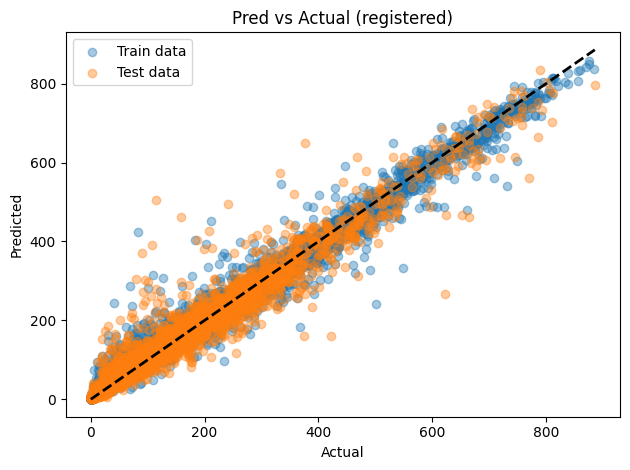

Feature Importances:
       Feature  Importance
3           hr    0.569188
6   workingday    0.150614
1           yr    0.087939
8         temp    0.045196
9        atemp    0.029845
2         mnth    0.029282
0       season    0.029001
10         hum    0.021747
7   weathersit    0.016735
5      weekday    0.010874
Train Model - Mean Squared Error: 340.0277
Train Model - R^2 Score: 0.9853
Final Model - Mean Squared Error: 1217.5403
Final Model - R^2 Score: 0.9448


In [ ]:
#Step 2: Train new model with best hyperparameters
# note - after grid search cv, best params were: n_estimators = 500 max_depth = 100 and min_samples_leaf = 2

final_rf2 = RandomForestRegressor(n_estimators=500,
                                 max_depth= 100, #grid_search.best_params_['max_depth']
                                 min_samples_leaf= 2, #grid_search.best_params_['min_samples_leaf']
                                 random_state=42)

final_rf2.fit(X_train2, Y_train2)

#plotting and feature importances

Y_pred_train2 = final_rf2.predict(X_train2)
Y_pred_final2 = final_rf2.predict(X_test2)

plt.scatter(Y_train2, Y_pred_train2, alpha=0.4, label = 'Train data')
plt.scatter(Y_test2, Y_pred_final2, alpha=0.4, label = 'Test data')

plt.plot([Y_test2.min(), Y_test2.max()],
            [Y_test2.min(), Y_test2.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title(f'Pred vs Actual (registered)')

plt.tight_layout()
plt.show()

importances2 = final_rf2.feature_importances_

feature_importance_df2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances2
})

feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df2.head(10))

mse_train2 = mean_squared_error(Y_train2, Y_pred_train2)
r2_train2 = r2_score(Y_train2, Y_pred_train2)

mse_final2 = mean_squared_error(Y_test2, Y_pred_final2)
r2_final2 = r2_score(Y_test2, Y_pred_final2)

print(f"Train Model - Mean Squared Error: {mse_train2:.4f}")
print(f"Train Model - R^2 Score: {r2_train2:.4f}")

print(f"Final Model - Mean Squared Error: {mse_final2:.4f}")
print(f"Final Model - R^2 Score: {r2_final2:.4f}")

### data visualization

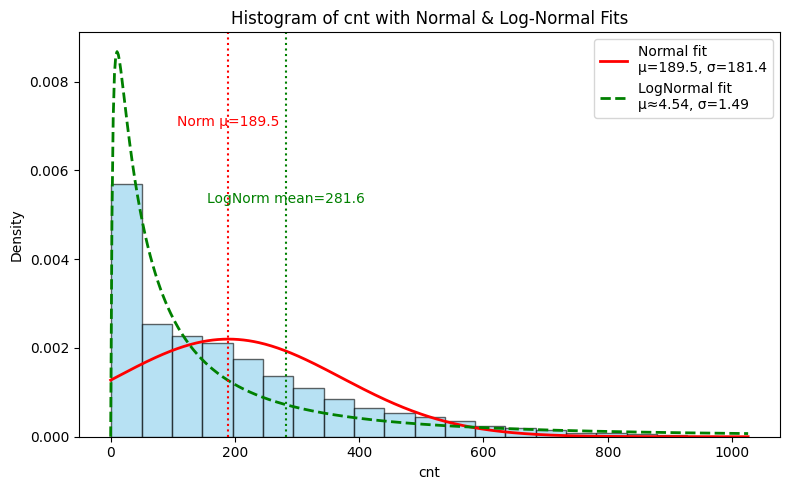

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Your data series
cnt = data['cnt'].values

# 1) Fit Normal
mu, sigma = cnt.mean(), cnt.std(ddof=0)

# 2) Fit Log-Normal (force loc=0)
ln_shape, ln_loc, ln_scale = lognorm.fit(cnt, floc=0)
# true log‑normal mean = scale * exp(shape^2 / 2)
ln_mean = lognorm.mean(ln_shape, loc=ln_loc, scale=ln_scale)

# 3) Histogram
fig, ax = plt.subplots(figsize=(8,5))
n, bins, patches = ax.hist(
    cnt, bins=20, density=True,
    alpha=0.6, color='skyblue', edgecolor='black'
)

# 4) Plot Normal PDF
x = np.linspace(0, cnt.max()*1.05, 500)
pdf_norm = norm.pdf(x, loc=mu, scale=sigma)
ax.plot(x, pdf_norm, 'r-', lw=2, label=f'Normal fit\nμ={mu:.1f}, σ={sigma:.1f}')

# 5) Plot Log‑Normal PDF
pdf_ln = lognorm.pdf(x, ln_shape, loc=ln_loc, scale=ln_scale)
ax.plot(x, pdf_ln, 'g--', lw=2, label=f'LogNormal fit\nμ≈{np.log(ln_scale):.2f}, σ={ln_shape:.2f}')

# 6) Vertical lines at the means
ax.axvline(mu, color='r', linestyle=':', lw=1.5)
ax.axvline(ln_mean, color='g', linestyle=':', lw=1.5)

# 7) Annotate the means
ymax = max(n.max(), pdf_norm.max(), pdf_ln.max())
ax.text(mu, ymax*0.8, f'Norm μ={mu:.1f}', color='r', ha='center', va='bottom')
ax.text(ln_mean, ymax*0.6, f'LogNorm mean={ln_mean:.1f}', color='g', ha='center', va='bottom')

# 8) Labels & legend
ax.set_title('Histogram of cnt with Normal & Log‑Normal Fits')
ax.set_xlabel('cnt')
ax.set_ylabel('Density')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

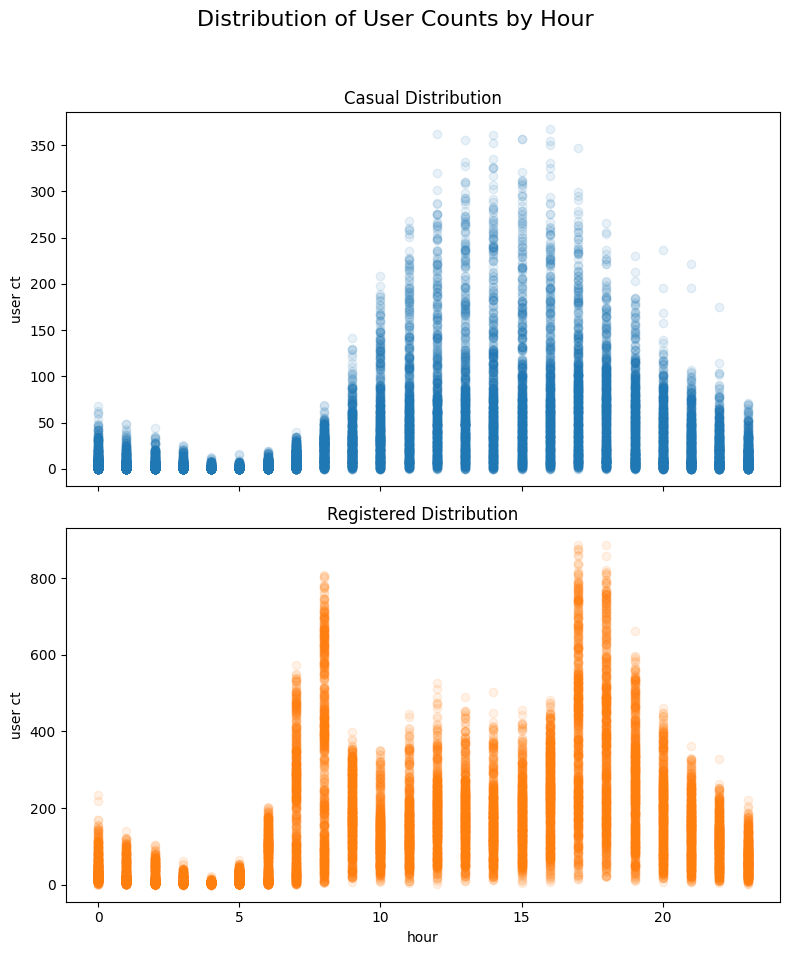

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 1 column, sharing the x-axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), sharex=True)

# Top subplot: hr vs Y1 (casual)
axes[0].scatter(
    X["hr"], Y1,
    alpha=0.1,
    color="C0"
)
axes[0].set_ylabel("user ct")
axes[0].set_title("Casual Distribution")

# Bottom subplot: hr vs Y2 (registered)
axes[1].scatter(
    X["hr"], Y2,
    alpha=0.1,
    color="C1"
)
axes[1].set_xlabel("hour")
axes[1].set_ylabel("user ct")
axes[1].set_title("Registered Distribution")

# Overall title
fig.suptitle("Distribution of User Counts by Hour", fontsize=16)

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
off_casual = data[data["workingday"] == 0]["casual"]
off_registered = data[data["workingday"] == 0]["registered"]
work_casual = data[data["workingday"] == 1]["casual"]
work_registered = data[data["workingday"] == 1]["registered"]

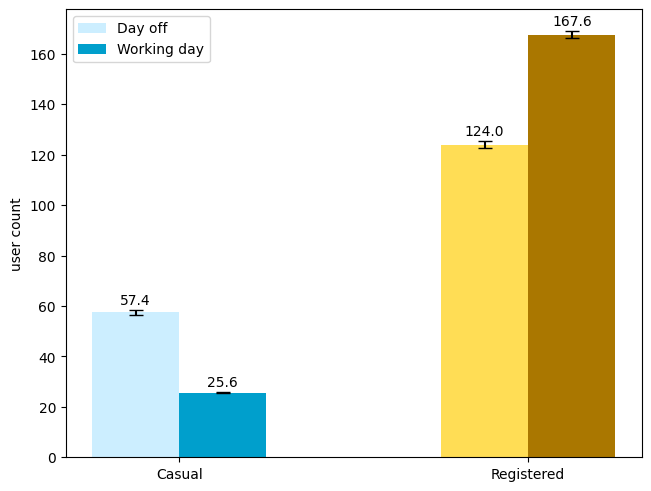

In [ ]:
# plot the bar chart for different criterion

import matplotlib.pyplot as plt

X_axis = ("Casual", "Registered")
Y_means = {
    'Day off':     (off_casual.mean(),      off_registered.mean()),
    'Working day': (work_casual.mean(),     work_registered.mean()),
}

Y_errs = {
    'Day off':     (off_casual.std(ddof=1)/np.sqrt(len(off_casual)),
                     off_registered.std(ddof=1)/np.sqrt(len(off_registered))),
    'Working day': (work_casual.std(ddof=1)/np.sqrt(len(work_casual)),
                     work_registered.std(ddof=1)/np.sqrt(len(work_registered))),
}

colors = {
    'Day off':     ['#CCEEFF', '#FFDD55'],  # casual, registered
    'Working day': ['#009FCC', '#AA7700'],
}

x = np.arange(len(X_axis))
width = 0.25
mult = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute in Y_means:
    means = Y_means[attribute]
    errs  = Y_errs[attribute]
    clr   = colors[attribute]

    # position each group
    offset = width * mult
    rects = ax.bar(
        x + offset,
        means,
        width,
        yerr=errs,
        capsize=5,          # add little caps on error bars
        color=clr,          # list of 2 colors → colors per bar
        label=attribute
    )
    ax.bar_label(rects, padding=2, fmt='%.1f')
    mult += 1

ax.set_ylabel('user count')
ax.set_xticks(x + width, X_axis)
ax.legend(loc='upper left')

plt.show()

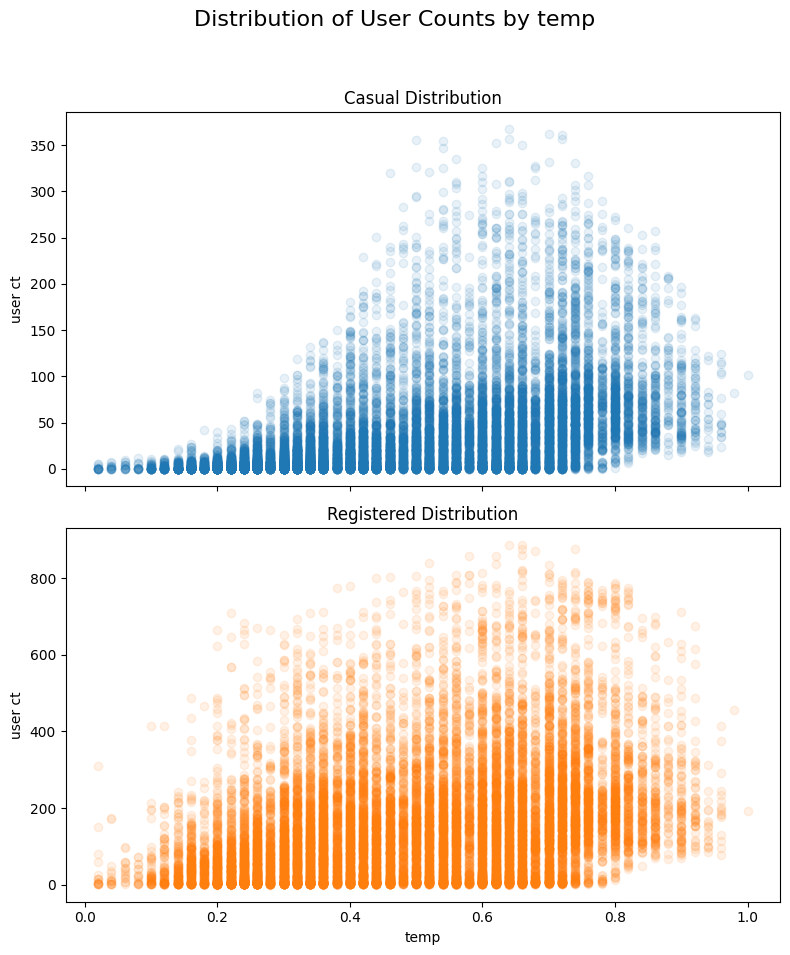

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 1 column, sharing the x-axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), sharex=True)

# Top subplot: hr vs Y1 (casual)
axes[0].scatter(
    X["temp"], Y1,
    alpha=0.1,
    color="C0"
)
axes[0].set_ylabel("user ct")
axes[0].set_title("Casual Distribution")

# Bottom subplot: hr vs Y2 (registered)
axes[1].scatter(
    X["temp"], Y2,
    alpha=0.1,
    color="C1"
)
axes[1].set_xlabel("temp")
axes[1].set_ylabel("user ct")
axes[1].set_title("Registered Distribution")

# Overall title
fig.suptitle("Distribution of User Counts by temp", fontsize=16)

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

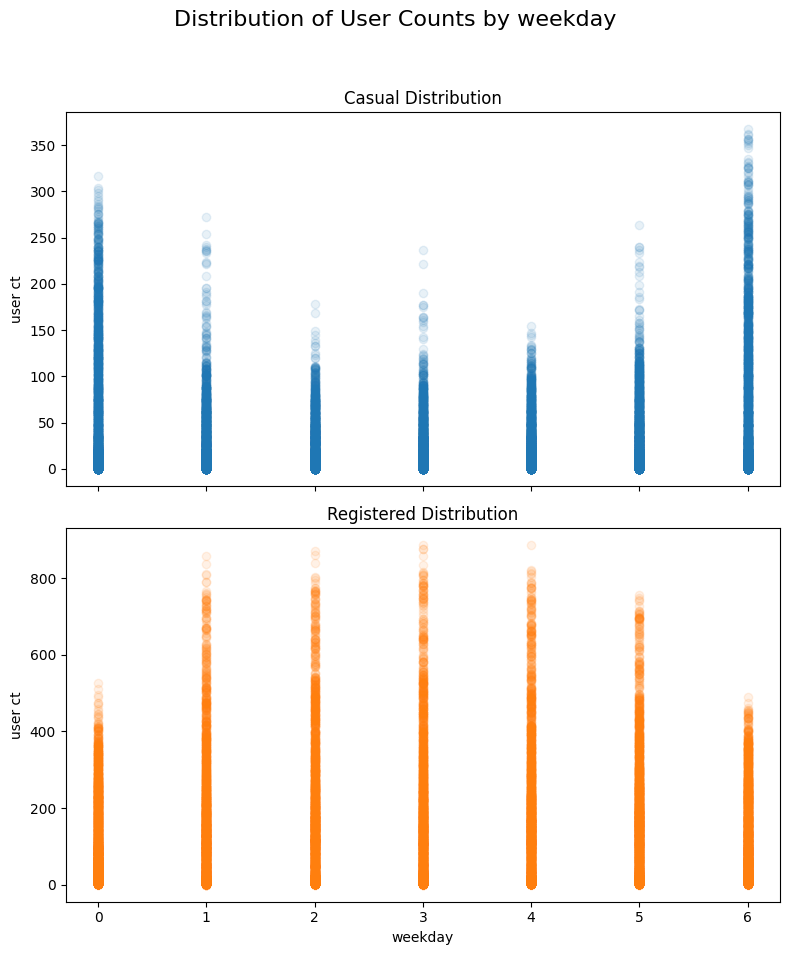

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 1 column, sharing the x-axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), sharex=True)

# Top subplot: hr vs Y1 (casual)
axes[0].scatter(
    X["weekday"], Y1,
    alpha=0.1,
    color="C0"
)
axes[0].set_ylabel("user ct")
axes[0].set_title("Casual Distribution")

# Bottom subplot: hr vs Y2 (registered)
axes[1].scatter(
    X["weekday"], Y2,
    alpha=0.1,
    color="C1"
)
axes[1].set_xlabel("weekday")
axes[1].set_ylabel("user ct")
axes[1].set_title("Registered Distribution")

# Overall title
fig.suptitle("Distribution of User Counts by weekday", fontsize=16)

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<ipython-input-37-d80e2c3d33bc>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M')[['casual', 'registered', 'cnt']].sum().reset_index()


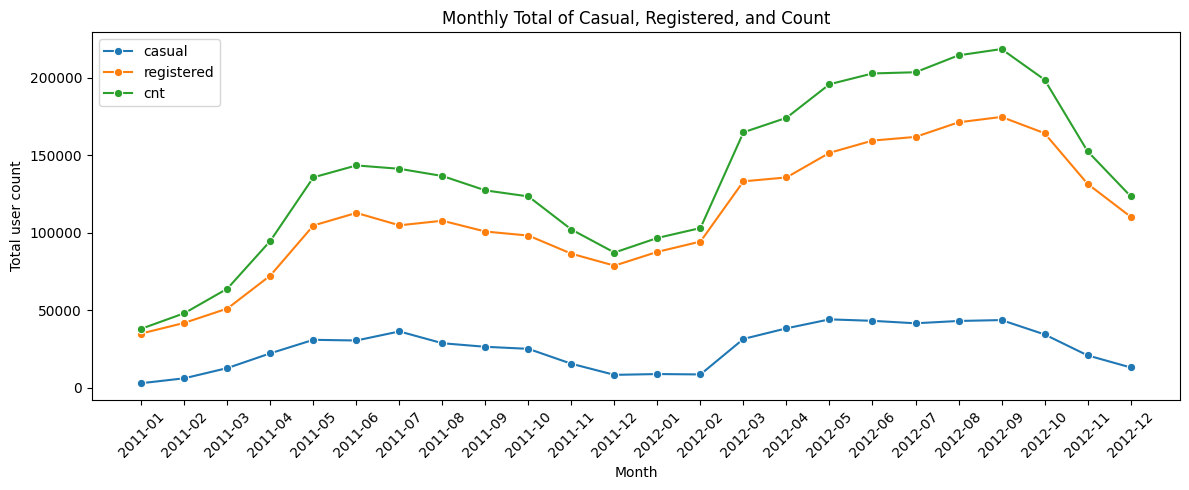

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Prepare and aggregate
df = data.copy()
df['dteday'] = pd.to_datetime(df['dteday'])

# set the date as index
df.set_index('dteday', inplace=True)

# resample by month, summing counts
monthly = df.resample('M')[['casual', 'registered', 'cnt']].sum().reset_index()

# optional: format the month nicely for the x‑axis
monthly['month_str'] = monthly['dteday'].dt.to_period('M').astype(str)

# 2) Melt for seaborn
dfm = monthly.melt(
    id_vars=['month_str'],
    value_vars=['casual', 'registered', 'cnt'],
    var_name='type',
    value_name='count'
)

# 3) Plot
plt.figure(figsize=(12, 5))

sns.lineplot(
    data=dfm,
    x='month_str',
    y='count',
    hue='type',
    marker='o',
    palette='tab10'
)

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total user count')
plt.title('Monthly Total of Casual, Registered, and Count')
plt.legend(title=None)
plt.tight_layout()
plt.show()

<ipython-input-39-7c20cc6e64bb>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_atemp      = df['atemp'].resample('M').mean()
<ipython-input-39-7c20cc6e64bb>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_weathersit = df['weathersit'].resample('M').mean()


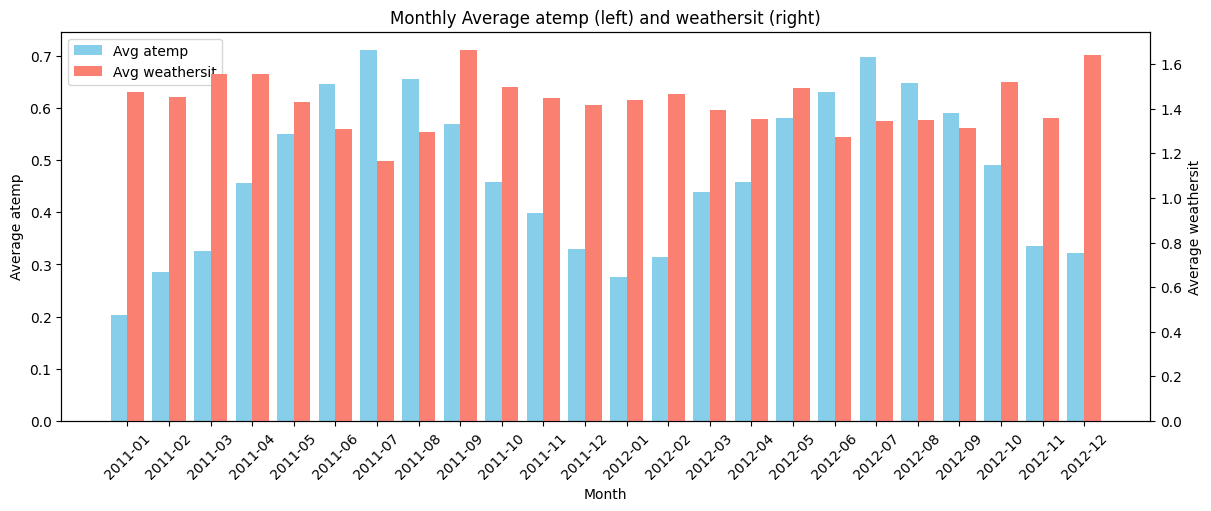

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Compute monthly averages
df = data.copy()
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)

monthly_atemp      = df['atemp'].resample('M').mean()
monthly_weathersit = df['weathersit'].resample('M').mean()

# prepare x‐axis
months = monthly_atemp.index.strftime('%Y-%m')
x      = np.arange(len(months))
width  = 0.4

# 2) Plot
fig, ax1 = plt.subplots(figsize=(12,5), layout='constrained')
ax2 = ax1.twinx()

# Left axis: atemp
bars1 = ax1.bar(
    x - width/2,
    monthly_atemp,
    width,
    color='skyblue',
    label='Avg atemp'
)

# Right axis: weathersit
bars2 = ax2.bar(
    x + width/2,
    monthly_weathersit,
    width,
    color='salmon',
    label='Avg weathersit'
)

# 3) Labels & ticks
ax1.set_xlabel('Month')
ax1.set_xticks(x)
ax1.set_xticklabels(months, rotation=45)
ax1.set_ylabel('Average atemp')
ax2.set_ylabel('Average weathersit')

# 4) Legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

plt.title('Monthly Average atemp (left) and weathersit (right)')
plt.show()

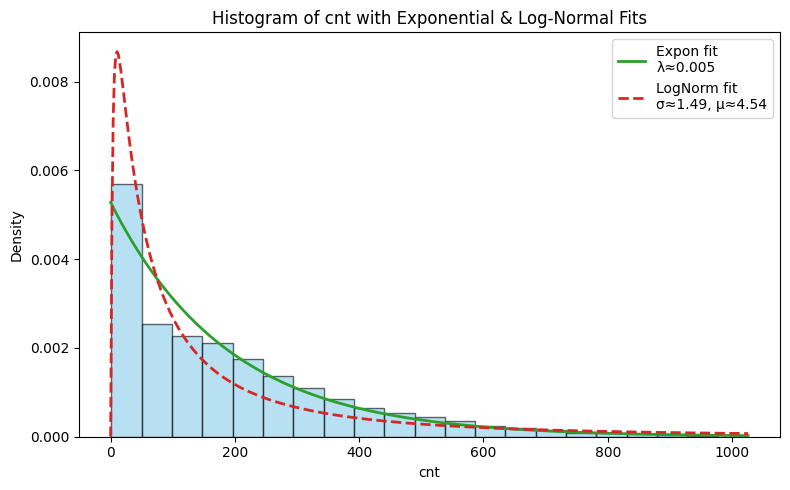

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, lognorm

# Your data series
cnt = data['cnt'].values

# 1) Fit an Exponential distribution
#    The “loc” is often zero for cnt≥0; scale = 1/λ
exp_loc, exp_scale = expon.fit(cnt, floc=0)

# 2) Fit a Log-Normal distribution
#    scipy’s lognorm parameterizes f(x) with a “shape” σ, loc, and scale=exp(μ)
ln_shape, ln_loc, ln_scale = lognorm.fit(cnt, floc=0)

# 3) Histogram (density)
fig, ax = plt.subplots(figsize=(8,5))
n, bins, patches = ax.hist(
    cnt, bins=20, density=True,
    alpha=0.6, color='skyblue', edgecolor='black'
)

# Domain for plotting PDFs
x = np.linspace(0, cnt.max()*1.05, 500)

# 4) Plot Exponential PDF
pdf_exp = expon.pdf(x, loc=exp_loc, scale=exp_scale)
ax.plot(x, pdf_exp, 'C2-', lw=2, label=f'Expon fit\nλ≈{1/exp_scale:.3f}')

# 5) Plot Log-Normal PDF
pdf_ln = lognorm.pdf(x, ln_shape, loc=ln_loc, scale=ln_scale)
ax.plot(x, pdf_ln, 'C3--', lw=2, label=f'LogNorm fit\nσ≈{ln_shape:.2f}, μ≈{np.log(ln_scale):.2f}')

# 6) Decorations
ax.set_title('Histogram of cnt with Exponential & Log-Normal Fits')
ax.set_xlabel('cnt')
ax.set_ylabel('Density')
ax.legend()
plt.tight_layout()
plt.show()

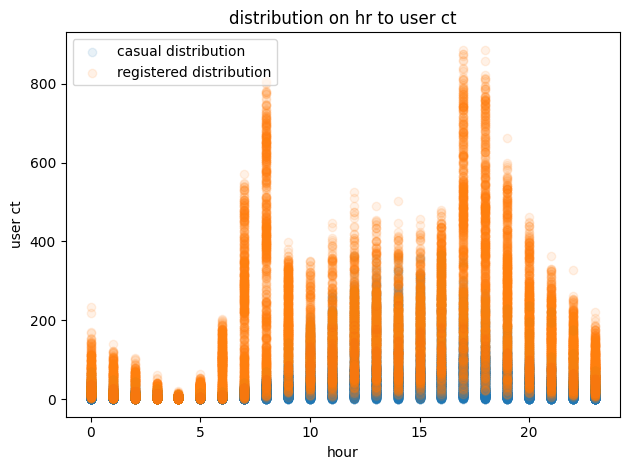

In [ ]:
#plotting for casual, hour

plt.scatter(X["hr"], Y1, alpha=0.1, label = 'casual distribution')
plt.scatter(X["hr"], Y2, alpha=0.1, label = 'registered distribution')

plt.xlabel('hour')
plt.ylabel('user ct')
plt.legend()
plt.title(f'distribution on hr to user ct')

plt.tight_layout()
plt.show()

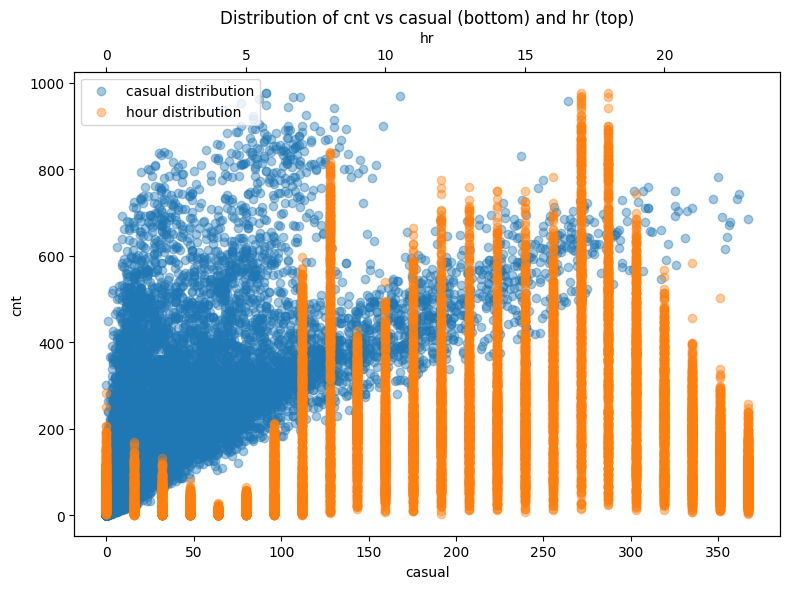

In [ ]:
import matplotlib.pyplot as plt

# assume X is your DataFrame, Y is your cnt array/Series

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot casual vs cnt on the bottom x-axis
p1 = ax1.scatter(
    X["casual"], Y,
    alpha=0.4,
    color="C0",
    label="casual distribution"
)
ax1.set_xlabel("casual")
ax1.set_ylabel("cnt")

# Create a second x-axis on the top that shares the same y-axis
ax2 = ax1.twiny()

# Plot hr vs cnt on the top x-axis
p2 = ax2.scatter(
    X["hr"], Y,
    alpha=0.4,
    color="C1",
    label="hour distribution"
)
ax2.set_xlabel("hr")

# Combine legends from both axes
handles = [p1, p2]
labels = [h.get_label() for h in handles]
ax1.legend(handles, labels, loc="upper left")

ax1.set_title("Distribution of cnt vs casual (bottom) and hr (top)")

plt.tight_layout()
plt.show()

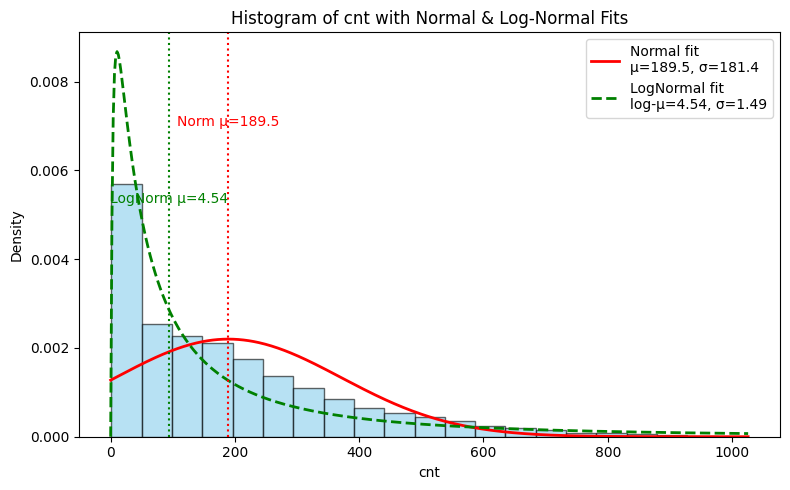

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Your data series
cnt = data['cnt'].values

# 1) Fit a Normal distribution
mu_norm, sigma_norm = cnt.mean(), cnt.std(ddof=0)

# 2) Fit a Log-Normal distribution (force loc=0)
ln_shape, ln_loc, ln_scale = lognorm.fit(cnt, floc=0)

# Underlying Normal’s μ parameter:
mu_ln = np.log(ln_scale)

# 3) Plot histogram
fig, ax = plt.subplots(figsize=(8,5))
n, bins, patches = ax.hist(
    cnt, bins=20, density=True,
    alpha=0.6, color='skyblue', edgecolor='black'
)

# 4) Normal PDF
x = np.linspace(0, cnt.max()*1.05, 500)
pdf_norm = norm.pdf(x, loc=mu_norm, scale=sigma_norm)
ax.plot(x, pdf_norm, 'r-', lw=2,
        label=f'Normal fit\nμ={mu_norm:.1f}, σ={sigma_norm:.1f}')

# 5) Log-Normal PDF
pdf_ln = lognorm.pdf(x, ln_shape, loc=ln_loc, scale=ln_scale)
ax.plot(x, pdf_ln, 'g--', lw=2,
        label=f'LogNormal fit\nlog‑μ={mu_ln:.2f}, σ={ln_shape:.2f}')

# 6) Vertical lines at the Normal mean and LogNormal μ‑parameter
ax.axvline(mu_norm, color='r', linestyle=':', lw=1.5)
ax.axvline(ln_scale, color='g', linestyle=':', lw=1.5)

# 7) Annotate
ymax = max(n.max(), pdf_norm.max(), pdf_ln.max())
ax.text(mu_norm,  ymax*0.8,  f'Norm μ={mu_norm:.1f}', color='r',
        ha='center', va='bottom')
ax.text(ln_scale, ymax*0.6,  f'LogNorm μ={mu_ln:.2f}', color='g',
        ha='center', va='bottom')

# 8) Labels & legend
ax.set_title('Histogram of cnt with Normal & Log‑Normal Fits')
ax.set_xlabel('cnt')
ax.set_ylabel('Density')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

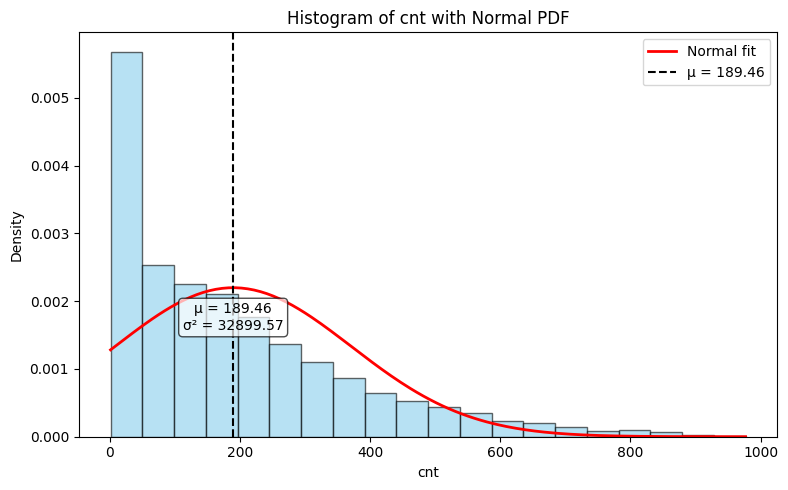

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Suppose your DataFrame is called `data`
cnt = data['cnt']

# 1) Compute sample mean and standard deviation
mu    = cnt.mean()
sigma = cnt.std(ddof=0)   # population std; use ddof=1 for sample std
var   = sigma**2

# 2) Plot histogram as a density
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(
    cnt,
    bins=20,
    density=True,
    alpha=0.6,
    color='skyblue',
    edgecolor='black'
)

# 3) Overlay the Normal PDF
xmin, xmax = bins[0], bins[-1]
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, p, 'r-', lw=2, label='Normal fit')

# 4) Mark the mean and annotate μ and σ²
plt.axvline(mu, color='k', linestyle='--', label=f'μ = {mu:.2f}')
plt.text(
    mu, max(p)*0.8,
    f'μ = {mu:.2f}\nσ² = {var:.2f}',
    ha='center',
    va='center',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

# Labels & legend
plt.title('Histogram of cnt with Normal PDF')
plt.xlabel('cnt')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

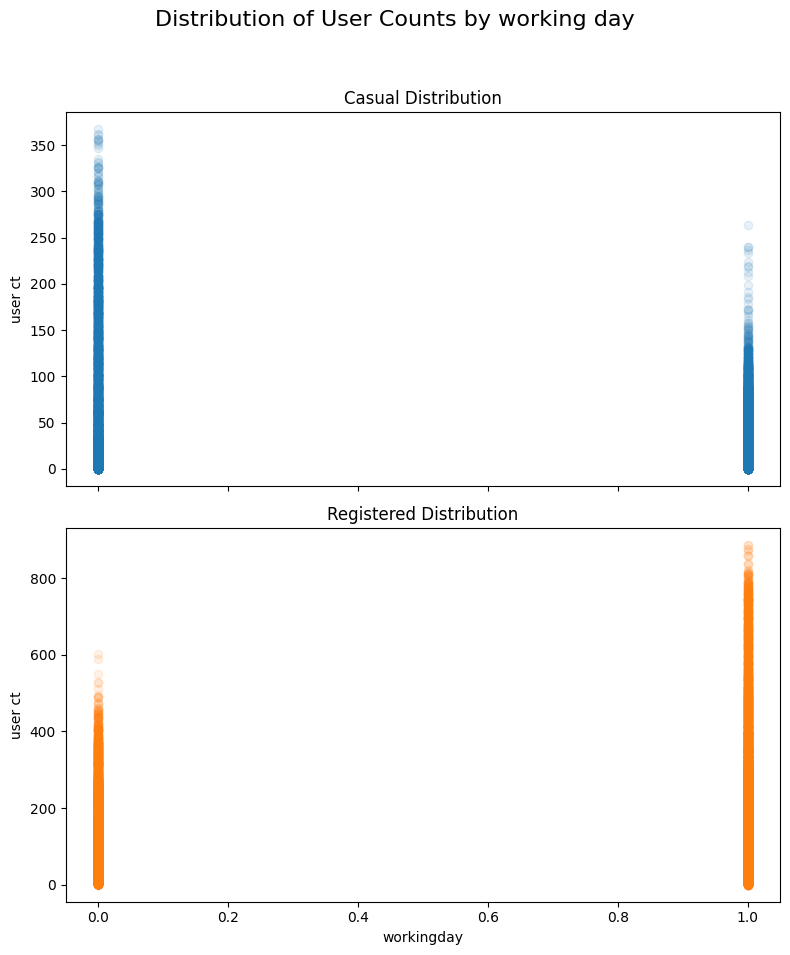

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 1 column, sharing the x-axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), sharex=True)

# Top subplot: hr vs Y1 (casual)
axes[0].scatter(
    X["workingday"], Y1,
    alpha=0.1,
    color="C0"
)
axes[0].set_ylabel("user ct")
axes[0].set_title("Casual Distribution")

# Bottom subplot: hr vs Y2 (registered)
axes[1].scatter(
    X["workingday"], Y2,
    alpha=0.1,
    color="C1"
)
axes[1].set_xlabel("workingday")
axes[1].set_ylabel("user ct")
axes[1].set_title("Registered Distribution")

# Overall title
fig.suptitle("Distribution of User Counts by working day", fontsize=16)

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
